In [3]:
import pandas as pd
df = pd.read_excel("Anomaly_detection_dataset.xlsx")
df.columns = ['Width', 'Height']
potl_outlier = pd.DataFrame([[30,22]], columns=['Width', 'Height']) # POTENTIAL ANOMALY
potl_outlier
df1 = pd.concat([df, potl_outlier], axis = 0)
df1 = df1.reset_index()
df1 = df1[['Width', 'Height']]
df1

,Width,Height
0,25,24
1,25,25
2,25,25
3,21,24
4,24,24
5,30,29
6,25,25
7,25,25
8,27,29
9,25,29


### Checking if individual variable values are an outlier with univariate checking method like Box-Plot visually first and then quantitatively to pin down the outlier observation(s)

<AxesSubplot:>

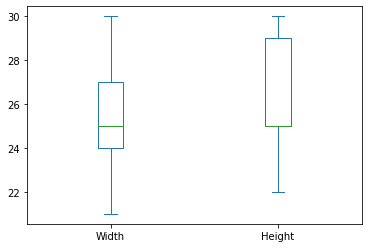

In [4]:
import matplotlib.pyplot as plt
df1.plot.box()

In [5]:
import numpy as np
def outlier_indices(x):
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outlier_index = np.where((x < lower_bound) | (x > upper_bound))
    return outlier_index


print("Outlier Indices of x1: ", outlier_indices(np.array(df1)[:,0])[0])
print("\nOutlier Values of x1: \n", np.array(df1)[outlier_indices(np.array(df1)[:,0])])
print("\n")
print("Outlier Indices of x2: ", outlier_indices(np.array(df1)[:,1])[0])
print("\nOutlier Values of x2: \n", np.array(df1)[outlier_indices(np.array(df1)[:,1])])

Outlier Indices of x1:  []

Outlier Values of x1: 
 []


Outlier Indices of x2:  []

Outlier Values of x2: 
 []


#### Clearly neither of the univariate features in this multivariate dataset contain outliers by itself

We opt for a multivariate anomaly detection technique on this dataset as this is not a supervised learning problem (like Regression where we could identify outlier detection techniques like rstudent from SAS compared to a critical t-value). Thus, technique used here will be isolation forest. 

It has a hyperparameter called contamination density. Here it is assumed to be 1%

In [6]:
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(42)

In [7]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.01),random_state=random_state) 
# n_estimators is the number of isolation forests used. It is akin to random forests being formed from many decision trees.
# max_samples isnumber of observations in x_train for training

# contamination: ‘auto’ or float, default=’auto’
# The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.

# If ‘auto’, the threshold is determined as in the original paper.

# If float, the contamination should be in the range (0, 0.5].

# For more info please refer: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
model.fit(df1[['Width', 'Height']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x162DACF2740, 'verbose': 0, 'warm_start': False}


C:\Users\ankit\anaconda3\envs\interview_prep\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
df1['scores'] = model.decision_function(df1[['Width', 'Height']])

df1['anomaly_score'] = model.predict(df1[['Width', 'Height']])

df1[df1['anomaly_score']==-1]#.head()

,Width,Height,scores,anomaly_score
25,30,22,-0.011052,-1


Thus the observation to check as a potential anomaly is identified as anomaly.